# SQL 語法入門

> 操作資料

郭耀仁

In [1]:
# 連結資料庫
import sqlite3
import pandas as pd

conn = sqlite3.connect('nba.db')

## 摘要

- 安裝 DB Browser for SQLite(DB4S)
- 創建、更新與刪除

## 安裝 DB Browser for SQLite(DB4S)

## 下載 [DB Browser for SQLite(DB4S)](https://sqlitebrowser.org/dl/)

## 按「下一步」完成安裝

![Imgur](https://i.imgur.com/55GrwYW.png?1)

## 按「下一步」完成安裝

![Imgur](https://i.imgur.com/col4ZxO.png?1)

## 按「下一步」完成安裝

![Imgur](https://i.imgur.com/WpZ72tQ.png?1)

## 按「下一步」完成安裝

![Imgur](https://i.imgur.com/bw899dD.png?1)

## 按「下一步」完成安裝

![Imgur](https://i.imgur.com/djPnZEm.png?1)

## 什麼是 [DB Browser for SQLite(DB4S)](https://sqlitebrowser.org/dl/)

> 支援 SQLite 資料庫系統的開源使用者介面軟體。

## 為什麼 [DB Browser for SQLite(DB4S)](https://sqlitebrowser.org/dl/)

> [DB Browser for SQLite(DB4S)](https://sqlitebrowser.org/dl/) 提供了像是試算表一樣的介面供使用者除了可以透過 SQL 指令也能夠以介面對資料進行操作。

## 舉 2019 年的 [Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2019) 為例

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def get_value_ratios(df, col_name):
    return df[col_name].value_counts() / df[col_name].value_counts().sum()
    
def get_checkbox_ratios(df, col_pattern):
    channel_names = []
    channel_checks = []
    for col_name in df.columns:
        if (col_pattern in col_name) and ('OTHER_TEXT' not in col_name):
            channel_name = df[col_name].value_counts().index
            channel_check = df[col_name].value_counts().values
            if channel_name.size != 0:
                channel_names.append(channel_name[0])
                channel_checks.append(channel_check[0])
    channel_counts = pd.Series(channel_checks, index=channel_names)
    channel_ratios = channel_counts / channel_counts.sum()
    channel_ratios_sorted = channel_ratios.sort_values(ascending=False)
    return channel_ratios_sorted

def get_ax(ans_ser, plot_title, ax):
    ax = ax
    ans_ser = ans_ser[:10][::-1]
    ax.barh(ans_ser.index, ans_ser.values, color=['c', 'c', 'c', 'c', 'c', 'r', 'c', 'c', 'c', 'c'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    xtick_labels = ["{}%".format(i) for i in range(0, 30, 5)]
    ax.set_xticklabels(xtick_labels)
    ax.set_title(plot_title)
    
def plot_ans_34(ans_34_ser):
    fig = plt.figure()
    ax = plt.axes()
    get_ax(ans_34_ser, "Which of the following relational database products do you use on a regular basis?", ax)
    plt.show()

survey_2019 = pd.read_csv("https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2019/multiple_choice_responses.csv", encoding='ISO-8859-1', skiprows=[1], low_memory=False)
da_2019 = survey_2019[survey_2019['Q5'] == 'Data Analyst']
ans_34_ser = get_checkbox_ratios(da_2019, 'Q34')

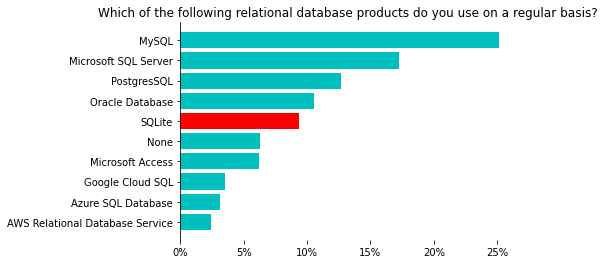

In [3]:
plot_ans_34(ans_34_ser)

## 除此之外 SQLite 還有

- 開源
- 自我包含
- 輕量

...等優點。

## 創建、更新與刪除

## 透過資料庫實現規模化且自動化的資料操作

- C(reate) 創建
- R(ead) 讀取
- U(pdate) 更新
- D(elete) 刪除

## 讀取以外，尚有創建、更新與刪除等操作

## 使用 DB4S 在本機端創建一個資料庫 `movies`

![Imgur](https://i.imgur.com/p4lMISB.png)

## 以 DB4S 執行 SQL 語法

![Imgur](https://i.imgur.com/1peBYBr.png)

## 以 `INSERT INTO` 語法插入觀測值

```sql
INSERT INTO movies (title, year, rating)
VALUES 
       ('The Shawshank Redemption', 1995, 9.2),
       ('The Godfather', 1972, 9.1),
       ('The Dark Knight', 2008, 9.0),
       ('Forrest Gump', 1994, 8.8);
```

## 以 `UPDATE` 語法更新觀測值

"The Shawshank Redemption" 於 1994 年在美國上映, 但是當年在台灣 1995 年才上映，片名取為「刺激1995」。

```sql
UPDATE movies
   SET year = 1994
 WHERE title = 'The Shawshank Redemption';
```

## 以 `DELETE` 語法刪除觀測值

```sql
DELETE FROM movies
      WHERE title = 'The Godfather';
```

## 以 `DROP` 語法刪除表格

```sql
DROP TABLE movies;
```

## 亦可以使用者介面匯入 CSV 檔案成為表格

![Imgur](https://i.imgur.com/DP97sJh.png)